# Step 1: Reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [21]:
df = pd.read_csv('data/iris.csv')

In [3]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species            int8
dtype: object

# Step 2: Data Pre-Processing

In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
df['species'] = pd.Categorical(values = df['species'], categories = ['setosa', 'versicolor', 'virginica'],ordered = True)

In [9]:
df['species'] = df['species'].cat.codes
# setosa: 0
# versicolor: 1
# virginica: 2
# using the .cat.codes method to change the columns dtypes

In [17]:
df.to_csv('data/cleaned_iris.csv', index= False)
# saving cleaned csv

# Step 3: EDA

In [18]:
data = pd.read_csv('data/cleaned_iris.csv')

In [19]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [31]:
sns.set_style('darkgrid')

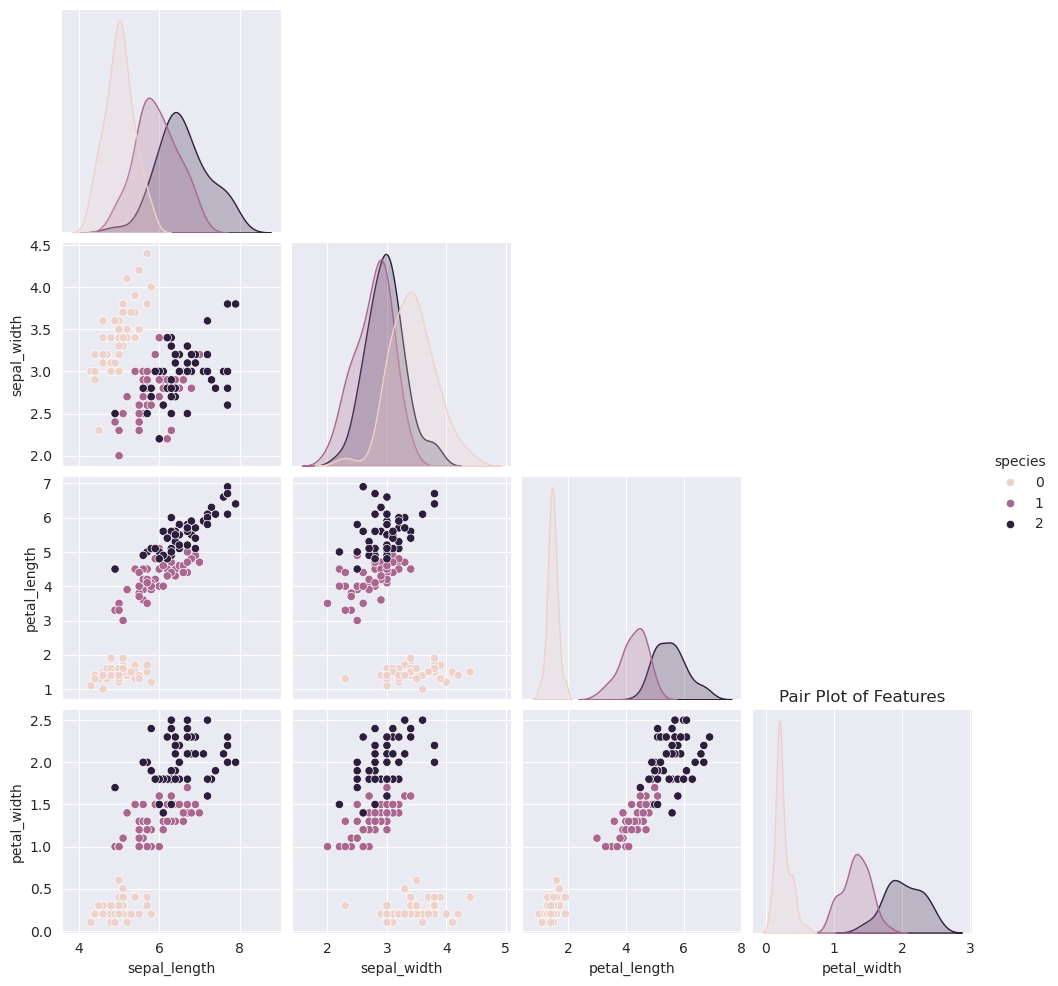

In [32]:
sns.pairplot(data, hue = 'species', corner= True)
plt.title('Pair Plot of Features')
plt.savefig('iris_visuals/pair_plot')
# decided on pairplot for everything, as there isn't really a lot of features to work with

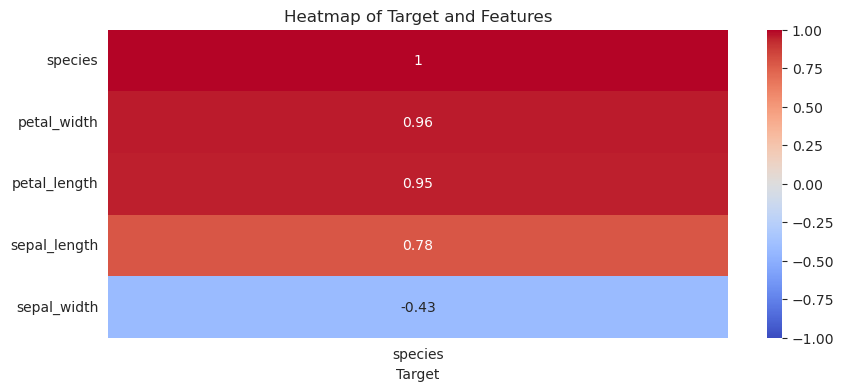

In [39]:
plt.figure(figsize= (10, 4))
sns.heatmap(data.corr()[['species']].sort_values(by = 'species', ascending = False), 
           vmin = -1, 
           vmax= 1, 
           annot = True, 
           cmap = 'coolwarm')
plt.title('Heatmap of Target and Features')
plt.xlabel('Target')
plt.savefig('iris_visuals/heatmap')

# Step 4: Modeling

In [40]:
data['species'].value_counts(normalize = True)

# need a score greater than 33.333 % repeating

species
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

In [41]:
X = data[['petal_width','petal_length','sepal_length']]

y = data['species']

### scale for knn

In [42]:
def model_factory(model, columns):
    """
    Creator: Charles Dillaway
    inputs: 
        model: The machine learning model object to use in the pipeline
        columns: the list of columns to use for scaling
    outputs:
        returns the model, ready to be fitted and used. 
    """
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), columns)
        ],
        remainder='passthrough'
    )
    model = Pipeline(
        steps=[
            ('preprocess', preprocessor),
            ('model', model)
        ]
    )
    return model

## KNN

In [64]:
X = data[['petal_width','petal_length','sepal_length']]

y = data['species']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [71]:
scores = []

for k in range(3, 32, 2):
    knn = model_factory(KNeighborsClassifier(n_neighbors = k,metric= 'euclidean'), X.columns)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    scores.append({'k': k, 'train_score': train_score, 'test_score': test_score})

df_scores = pd.DataFrame(scores)

In [72]:
df_scores
# k of 3

,k,train_score,test_score
0,3,0.973214,0.973684
1,5,0.973214,0.947368
2,7,0.964286,0.947368
3,9,0.973214,0.973684
4,11,0.973214,0.947368
5,13,0.964286,0.973684
6,15,0.964286,0.947368
7,17,0.964286,0.947368
8,19,0.964286,0.921053
9,21,0.964286,0.921053


In [66]:
knn = model_factory(KNeighborsClassifier(n_neighbors = 3,metric= 'euclidean'), X.columns)

In [67]:
knn.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [68]:
knn.score(X_test, y_test)

0.9736842105263158

In [69]:
sns.set_style('dark')

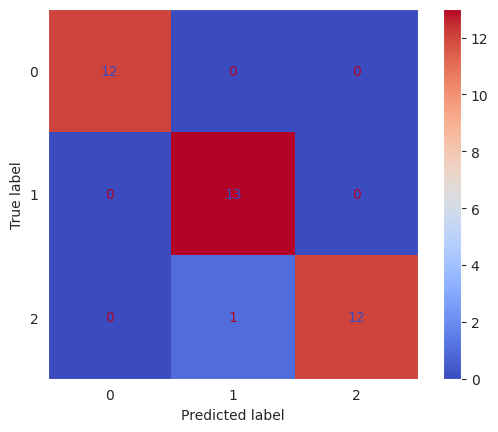

In [70]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap = 'coolwarm')

### Pickling KNN (best model for now)

In [136]:
iris_knn = ''

In [137]:
with open('iris_knn', 'wb') as file:
    model = pickle.dump(knn, file)

In [138]:
with open('iris_knn', 'rb') as file:
    model = pickle.load(file)

## Logistic Regression

In [81]:
X = data[['petal_width','petal_length','sepal_length']]

y = data['species']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [91]:
lg = LogisticRegression()

In [92]:
lg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [93]:
lg.score(X_test, y_test)

0.9473684210526315

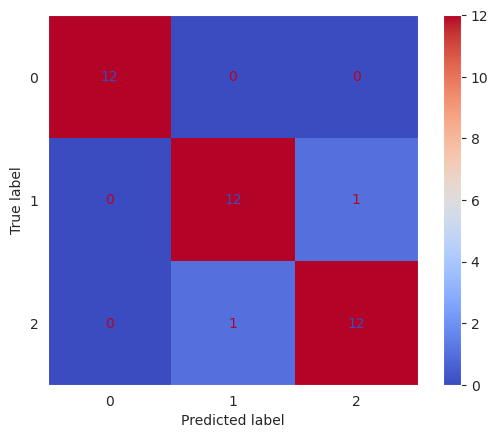

In [94]:
ConfusionMatrixDisplay.from_estimator(lg, X_test, y_test, cmap = 'coolwarm')

## Decission Tree

In [130]:
X = data[['petal_width','petal_length']]

y = data['species']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [132]:
dtc = DecisionTreeClassifier(random_state= 42)

In [133]:
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [134]:
dtc.score(X_test, y_test)

0.9210526315789473

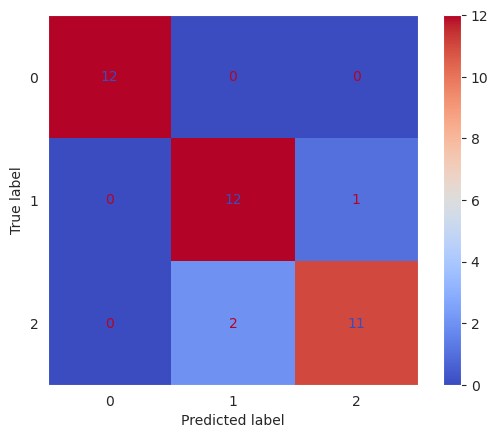

In [135]:
ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test, cmap = 'coolwarm')

## Random Forest

In [124]:
X = data[['petal_width','petal_length']]

y = data['species']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [126]:
rfc = RandomForestClassifier(random_state= 42)

In [127]:
rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [128]:
rfc.score(X_test, y_test)

0.9473684210526315

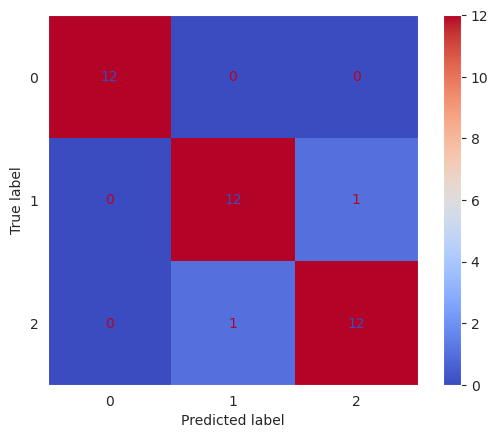

In [129]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, cmap = 'coolwarm')